In [17]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
data_dir = Path("../data/photographed_data/")
render_dir = Path("../data/mediapipe_render/")
log_dir = Path("../logs/evaluations/runs/image-translate_auc2/best")
save_dir = log_dir.joinpath("incorrect_img")
save_dir.mkdir(exist_ok=True)
df = pd.read_csv(log_dir.joinpath("result.csv"))
df.head()

,PATH,TARGETS,PREDs
0,G/WIN_20221122_16_14_30_Pro_00000000.jpg,0,1
1,G/WIN_20221122_16_14_30_Pro_00000001.jpg,0,0
2,G/WIN_20221122_16_14_30_Pro_00000002.jpg,0,0
3,G/WIN_20221122_16_14_30_Pro_00000003.jpg,0,1
4,G/WIN_20221122_16_14_30_Pro_00000004.jpg,0,1


In [15]:
targets = df["TARGETS"].values
preds = df["PREDs"].values
correct_path = df[targets == preds]["PATH"]
incorrect_df = df[targets != preds]
incorrect_df

,PATH,TARGETS,PREDs
0,G/WIN_20221122_16_14_30_Pro_00000000.jpg,0,1
3,G/WIN_20221122_16_14_30_Pro_00000003.jpg,0,1
4,G/WIN_20221122_16_14_30_Pro_00000004.jpg,0,1
5,G/WIN_20221122_16_14_30_Pro_00000005.jpg,0,1
6,G/WIN_20221122_16_14_30_Pro_00000006.jpg,0,1
...,...,...,...
1292,H/WIN_20221122_15_59_43_Pro_00000703.jpg,0,1
1342,H/WIN_20221122_15_59_43_Pro_00000753.jpg,0,1
1355,H/WIN_20221122_15_59_43_Pro_00000766.jpg,0,1
1481,H/WIN_20221122_15_59_43_Pro_00000892.jpg,0,1


 28%|██▊       | 51/182 [01:33<03:59,  1.83s/it]


KeyboardInterrupt: 

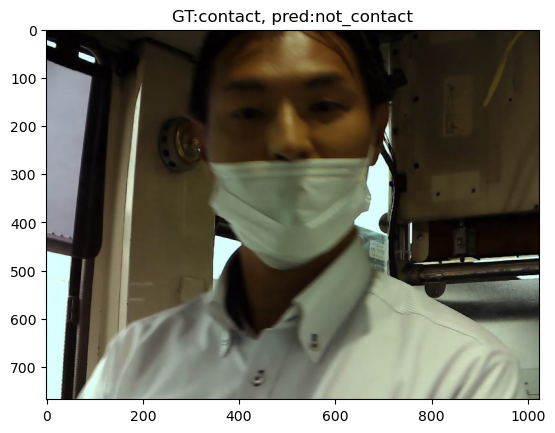

In [22]:
category = ["not_contact", "contact"]
is_render = False
for i, relative_img_path in enumerate(tqdm(incorrect_df["PATH"].values)):
    target, pred = incorrect_df.iloc[i,1:]
    if is_render:
        img_path = render_dir.joinpath(relative_img_path) 
    else:
        img_path = data_dir.joinpath(relative_img_path) 
    image = np.array(Image.open(img_path))
    tag = category[target]
    plt.imshow(image)
    plt.title(f"GT:{tag}, pred:{category[pred]}")
    # plt.show()
    plt.savefig(save_dir.joinpath(img_path.name))
    plt.clf()
    plt.close()
    # break